In [4]:
#Get playlist metadata

import requests
import urllib

headers = {
    # Request headers
    'Ocp-Apim-Subscription-Key': '785e3ae3595445c0bb0550afd7c494f6',
}

params = urllib.parse.urlencode({})

response = requests.get("https://www.haloapi.com/metadata/h5/metadata/playlists", headers=headers)
status_code = response.status_code
print(status_code)
playlists = response.json()

playlists[1]

200


{'contentId': 'f27a65eb-2d11-4965-aa9c-daa088fa5c9c',
 'description': 'No shields, no motion tracker.  Aim for the Head!',
 'gameMode': 'Arena',
 'id': 'f27a65eb-2d11-4965-aa9c-daa088fa5c9c',
 'imageUrl': None,
 'isActive': False,
 'isRanked': True,
 'name': 'SWAT'}

In [5]:
#Get season metadata

headers = {
    # Request headers
    'Ocp-Apim-Subscription-Key': '785e3ae3595445c0bb0550afd7c494f6',
}

params = urllib.parse.urlencode({
})

response = requests.get("https://www.haloapi.com/metadata/h5/metadata/seasons", headers=headers)
status_code = response.status_code
print(status_code)
seasons = response.json()

200


In [6]:
#Get player leaderboard

headers = {
    # Request headers
    'Ocp-Apim-Subscription-Key': '785e3ae3595445c0bb0550afd7c494f6',
}

params = urllib.parse.urlencode({
        'count': '5',
})

response = requests.get("https://www.haloapi.com/stats/h5/player-leaderboards/csr/2041d318-dd22-47c2-a487-2818ecf14e41/c98949ae-60a8-43dc-85d7-0feb0b92e719?%s" % params, headers=headers)
status_code = response.status_code
print(status_code)
leaderboard = response.json()

leaderboard

200


{'Count': 5,
 'Links': {'Self': {'AcknowledgementTypeId': 0,
   'AuthenticationLifetimeExtensionSupported': False,
   'AuthorityId': 'spartanstats',
   'Path': '/h5/player-leaderboards/csr/2041d318-dd22-47c2-a487-2818ecf14e41/c98949ae-60a8-43dc-85d7-0feb0b92e719',
   'QueryString': '?include-xuids=false&view=full&include-ratings=false&include-times=false&count=5',
   'RetryPolicyId': '',
   'TopicName': ''}},
 'ResultCount': 5,
 'Results': [{'Player': {'Gamertag': 'LethuL', 'Xuid': None},
   'Rank': 1,
   'Score': {'Csr': 2705,
    'DesignationId': 7,
    'PercentToNextTier': 0,
    'Rank': 1,
    'Tier': 1}},
  {'Player': {'Gamertag': 'Roy the LION', 'Xuid': None},
   'Rank': 2,
   'Score': {'Csr': 2658,
    'DesignationId': 7,
    'PercentToNextTier': 0,
    'Rank': 2,
    'Tier': 1}},
  {'Player': {'Gamertag': 'HAMY', 'Xuid': None},
   'Rank': 3,
   'Score': {'Csr': 2654,
    'DesignationId': 7,
    'PercentToNextTier': 0,
    'Rank': 3,
    'Tier': 1}},
  {'Player': {'Gamertag': 'l

In [25]:
#test extracting specific data

gt = leaderboard["Results"][2]["Player"]["Gamertag"]
csr = leaderboard["Results"][2]["Score"]["Csr"]
print(gt)
print(csr)

HAMY
2654


In [35]:
# practice a for loop to get all the values
for something in range(0, len(leaderboard["Results"])):
    gt = leaderboard["Results"][something]["Player"]["Gamertag"]
    csr = leaderboard["Results"][something]["Score"]["Csr"]
    print("Rank", something + 1)
    print(gt)
    print("CSR:", csr)

Rank 1
LethuL
CSR: 2705
Rank 2
Roy the LION
CSR: 2658
Rank 3
HAMY
CSR: 2654
Rank 4
lmpulsion
CSR: 2622
Rank 5
Arkanum JS
CSR: 2611


In [51]:
#Get season metadata

headers = {
    # Request headers
    'Ocp-Apim-Subscription-Key': '785e3ae3595445c0bb0550afd7c494f6',
}
params = urllib.parse.urlencode({})

response = requests.get("https://www.haloapi.com/metadata/h5/metadata/seasons", headers=headers)
status_code = response.status_code
seasons = response.json()

#Get playlists metadata
response = requests.get("https://www.haloapi.com/metadata/h5/metadata/playlists", headers=headers)
status_code = response.status_code
print(status_code)
playlists = response.json()

200


In [69]:
seasons_df = pd.DataFrame()
seasons_df = seasons_df.from_dict(seasons)

seasons_df = seasons_df.drop(["contentId", "endDate", "iconUrl", "isActive", "startDate", "playlists"], axis = 1)
seasons_df

#seasons_df["playlists"][1]

,id,name
0,2041d318-dd22-47c2-a487-2818ecf14e41,Preseason
1,2fcc20a0-53ff-4ffb-8f72-eebb2e419273,January 2016 Season
2,b46c2095-4ca6-4f4b-a565-4702d7cfe586,February 2016 Season
3,b28521af-7c40-4fe2-8d6e-158a5c2d9c03,March 2016 Season
4,654493ed-b12d-40ee-902b-db809433f158,April 2016 Season
5,8787875e-d2c6-4c50-b949-38e22728f9f4,May 2016 Season
6,6b0ac5d0-5de8-4c51-a4fa-4d5911a90176,June-July 2016 Season
7,f245fb7d-09ce-4011-8e7e-8a08c96c4d2a,August 2016 Season
8,8c7d848f-1437-4ce1-8e6a-f41850075d01,Fall 2016 Season


In [68]:
playlists_df = pd.DataFrame()
playlists_df = playlists_df.from_dict(playlists)

playlists_df = playlists_df.drop(["contentId", "description", "gameMode", "imageUrl", "isActive", "isRanked"], axis = 1)
Team_Arena_id = playlists_df[playlists_df["name"] == "Team Arena"]

Team_Arena_id

,id,name
4,c98949ae-60a8-43dc-85d7-0feb0b92e719,Team Arena


# Working from here
I can get a season's leaderboard, and I can format that into a good DataFrame with the relevant info and make a plot with the gamertags as the x labels.

I need to figure out how to add each season's DataFrame with a column indicating which season. This means I need to know how to iterate this process effectively to get one big DataFrame. Then I can plot the CSR's needed to be in the top 5 across all seasons.

In [ ]:
#Get player leaderboards for all seasons

headers = {
    # Request headers
    'Ocp-Apim-Subscription-Key': '785e3ae3595445c0bb0550afd7c494f6',
}

params = urllib.parse.urlencode({
        'count': '10',
})


#Access API for each season of Team Arena and add to a dataframe
LDRBRD = pd.DataFrame()
#make a dictionary to hold all the dictionaries we receive
for id_num in seasons_df["id"]:
    season_id = id_num
    playlist_id = Team_Arena_id.iloc[0][0] #Team Arena's id doesn't change, change for other playlists
#place seasons and playlists into url
    response = requests.get(
        "https://www.haloapi.com/stats/h5/player-leaderboards/csr/%s/%s?%s" % season_id, playlist_id, params,
        headers=headers
    )
##status_code = response.status_code
##print(status_code)
    #add to the LDRBRD
    leaderboard = response.json()
    LDRBRD = LDRBRD.from_dict(leaderboard)
    #LDRBRD.update(leaderboard)

In [133]:
lbdf = pd.DataFrame()
lbdf = lbdf.from_dict(leaderboard["Results"])
Gamertag = pd.Series()
CSR = pd.Series()
for x in range(0, len(lbdf)):
    Gamertag.set_value(x, lbdf["Player"][x]["Gamertag"])
    CSR.set_value(x, lbdf["Score"][x]["Csr"])
    
#now that we have our values in Series vars, put them into the dataframe and drop the unnecessary ones

lbdf = lbdf.drop(["Player", "Score"], axis = 1)
lbdf.insert(0, "Gamertag", Gamertag)
lbdf.insert(2, "CSR Points", CSR)

lbdf

,Gamertag,Rank,CSR Points
0,LethuL,1,2705
1,Roy the LION,2,2658
2,HAMY,3,2654
3,lmpulsion,4,2622
4,Arkanum JS,5,2611


In [136]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

([<matplotlib.axis.XTick at 0x20d7418f4e0>,
 <a list of 5 Text xticklabel objects>)

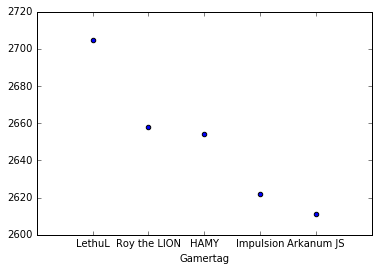

In [149]:
CSR_ranks_plot = plt.scatter(range(0,len(lbdf)), lbdf["CSR Points"])
plt.xlabel("Gamertag")
plt.xticks(range(0, len(lbdf)), lbdf["Gamertag"])